# Rapport sur le filtre de bloom

In [64]:
import matplotlib.pyplot as plt

### Les comparaisons de temps

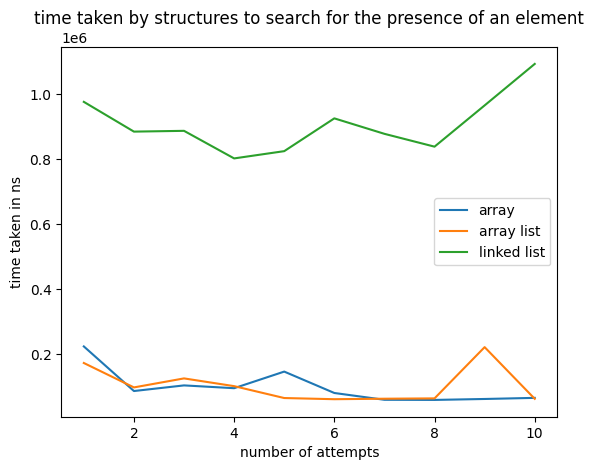

In [65]:
arrayNs=[224600, 87600, 104900, 96300, 147300, 81600, 60700, 60300, 63200, 66600]
arrayX=[1,2,3,4,5,6,7,8,9,10]
arrayListNs =[173700, 98700, 126400, 102600, 66100, 62500, 64000, 65000, 222400, 63700]
linkedListNs = [975700, 884300, 886700, 802000, 824300, 925000, 877500, 838100, 964800, 1092200]

plt.title("time taken by structures to search for the presence of an element")
plt.plot(arrayX,arrayNs, label="array")
plt.plot(arrayX, arrayListNs, label="array list")
plt.plot(arrayX,linkedListNs, label="linked list")
plt.xlabel("number of attempts")
plt.ylabel('time taken in ns')
plt.legend()
#plt.savefig('timeComparison.png')

Nous utilisons un filtre de 10000 remplis chacun de 1000 objets aléatoires.
Pour chacune des structures de données, nous avons effectué une recherche de 100 éléments aléatoires.
Nous pouvons donc voir grâce au graphique ci-dessus qu'il a y a une nette différence.
En effet la liste chaînée est nettement plus lente car pour rechercher un élément, 
à cause des adresses nous devons parcourir chaque élément jusqu'à l'élément recherché.
Dans le pire cas il faut parcourir toute la liste du début à la fin.
Quant à eux, le tableau et l'ArrayList sont beaucoup plus rapides et très similaire.
On peut imaginer qu'ils utilisent un autre algorithme de recherche plus efficace. 

### Etude du taux d'erreur selon le nombre de fonction de hash et d'éléments dans le filtre

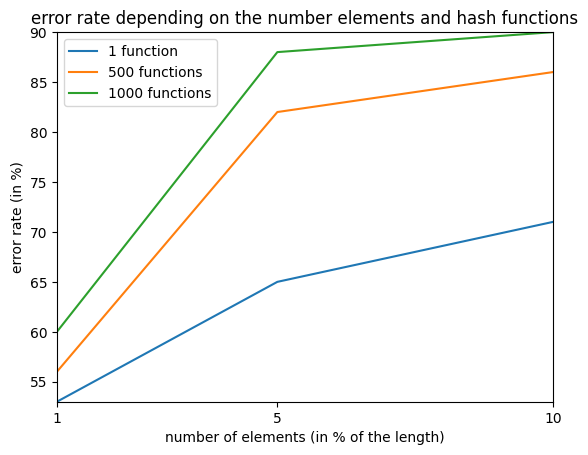

In [67]:
tauxK1 = [53,65,71]
tauxK500 =[56,82,86]
tauxK1000=[60,88,90]
xk=[1,5,10]


plt.plot(xk, tauxK1, label="1 function")
plt.plot(xk, tauxK500, label="500 functions")
plt.plot(xk, tauxK1000, label="1000 functions")
plt.xlabel("number of elements (in % of the length)")
plt.ylabel("error rate (in %)")
plt.legend()
plt.title("error rate depending on the number elements and hash functions")
plt.margins(x=0, y=0)
plt.xticks(xk)
plt.show()

Ici pour nous avons toujours notre filtre de 10 000 éléments.
Nous testons le taux d'erreur de la recherche d'un élément selon le nombre de fonctions de
hashage et la quantité d'élément présent dans le filtre. Pour rappel, ces erreurs correspondent
uniquement au fait d'avoir trouvé un élément qui n'a pas été inséré au préalable dans la liste. 
Nous voyons sur le graphique que pour le plus petit nombre de fonctions de hash (soit une),
le taux d'erreur est le plus bas. Il est malgré tout assez élévé car le nombre d'éléments est de 100 (1% de 10 000).
Nous voyons également que pour le même nombre de fonction de hash, le taux d'erreur augmente 
lorsque le nombre d'éléments dans le filtre augmente.

En résumé, lorsque le nombre de fonctions de hash augmente, le taux d'erreur augmente.
Il en va de même lorsque le nombre d'éléments dans le filtre augmente, le taux d'erreur.
Les deux sont très liés car en effet plus on a de fonctions de hash ou plus on a d'éléments, 
plus on devra mettre de valeurs de notre filtre à "1". C'est exactement ce qui augmente notre taux d'erreur.
Avec plus de valeurs à "1", on pourra trouver plus d'éléments n'appartenant pas au filtre. 

Par exemple, soit notre filtre de bloom de deux fonctions de hash, et d'une taille de 10 :  
en insérant 3, on obtient &nbsp; &nbsp; &nbsp; &nbsp; ` 0 0 0 0 0 0 0 0 1 1 `  
en insérant 15642, on obtient ` 0 0 0 1 0 0 1 0 0 0 `  
soit avec les deux éléments : &nbsp;&nbsp;` 0 0 0 1 0 0 1 0 1 1 `  
Il y a forcément un élément qui correspond à &nbsp; ` 0 0 0 0 0 0 1 0 0 1 `  
Donc plus il y a de 1, plus la probabilité d'avoir des faux éléments comme celui la est forte.